<a href="https://colab.research.google.com/github/SergioLamosLozano/Fundamentos-RN/blob/main/Clase26_04_25_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4877 - loss: 0.8862 - val_accuracy: 0.7469 - val_loss: 0.7404
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.6887 - val_accuracy: 0.8469 - val_loss: 0.6096
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.5701 - val_accuracy: 0.8875 - val_loss: 0.5214
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9331 - loss: 0.4762 - val_accuracy: 0.9031 - val_loss: 0.4578
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9331 - loss: 0.4073 - val_accuracy: 0.9062 - val_loss: 0.4127
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9277 - loss: 0.3751 - val_accuracy: 0.9000 - val_loss: 0.3794
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 0.3329 - val_accuracy: 0.8969 - val_loss: 0.3533
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.3052 - val_accuracy: 0.9031 - val_loss

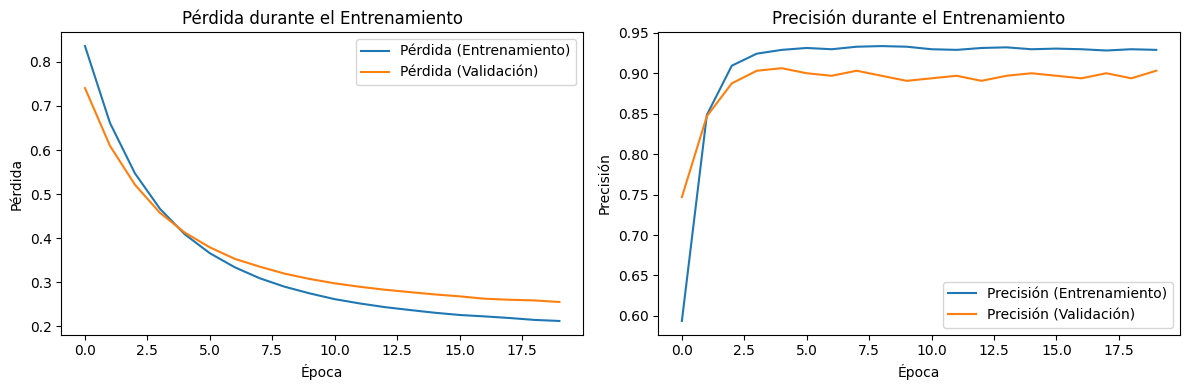

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# 1. Gerar datos sinteticos
np.random.seed(42) # Para reproductividad
n_samples = 2000 # Numero de clientes
n_features = 10 # Numero de clientes

# Generar caracteristicas aleatorias (Simulando: Edad, Ingresos, etc)
x = np.random.randn(n_samples, n_features) # Datos normalizados

# Generar etiquetas (0: no compra, 1: compra) basadas en una combinacion lineal
weights = np.random.rand(n_features) # Pesos ficticios
y = (np.dot(x, weights) + np.random.randn(n_samples) * 0.5 > 0).astype(int) # Etiquetas binarias
# Dividir datos en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Crear el modelo (igual al original)
model = Sequential()
model.add(Dense(64, input_dim= 10, activation='relu', kernel_regularizer=l2(0.01))) # Capa oculta
model.add(Dense(1, activation='sigmoid')) # Capa de salida

# 3. Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Resumen del modelo
model.summary()

# 5. Entrenar el modelo
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose = 1)

# 6. Evaluar el modelo en datos de prueba
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nPrecisión en el conjunto de prueba: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)

# 7. Visualizar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (Validación)')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()